Problem 1

In [15]:
import numpy as np
def hatFunc(x):
    if x < 0:
        return 0.0
    elif 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    elif x >= 2:
        return 0.0
    
import numpy as np
x=np.linspace(0,4,100)
y=map(hatFunc,x)

#*****************************************
#numpy build in function 
func_vec = np.vectorize(hatFunc)
y_0=func_vec(x)
#writen solution 
def hatFunc_vec(x_):
    y=list()
    for x in x_:
        if x < 0:
             y.append(0.0)
        elif 0 <= x < 1:
             y.append(x)
        elif 1 <= x < 2:
              y.append(2 - x)
        elif x >= 2:
             y.append(0.0)
    return y
#******************************************
#given solution in the lecture 
def hatFunc_vect(x):
    y=x.copy()
    y[x<0]=0.
    index=np.logical_and(0.<=x,x<1.)
    y[index]=x[index]
    index=np.logical_and(1.<=x,x<2.)
    y[index]=2.-x[index]
    y[x>=2]=0.
    
    return y
 
y_1=hatFunc_vec(x)
y_2=hatFunc_vect(x)
print y_0
print '***********************************************'
print y_1
print '***********************************************'
print y_2

[0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 0.98989899 0.94949495 0.90909091 0.86868687 0.82828283
 0.78787879 0.74747475 0.70707071 0.66666667 0.62626263 0.58585859
 0.54545455 0.50505051 0.46464646 0.42424242 0.38383838 0.34343434
 0.3030303  0.26262626 0.22222222 0.18181818 0.14141414 0.1010101
 0.06060606 0.02020202 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.      

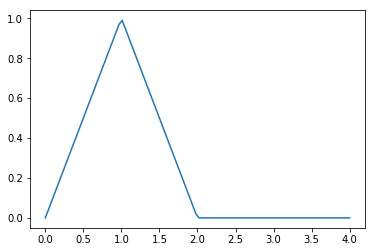

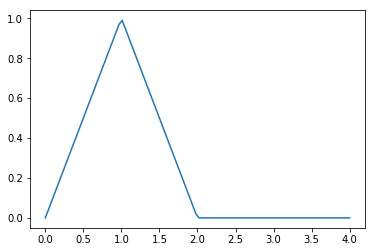

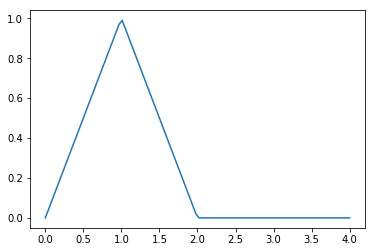

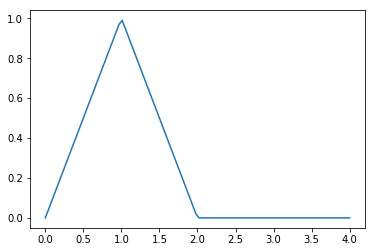

In [16]:
from matplotlib import pyplot as mp
mp.plot(x,y)
mp.show()
mp.plot(x,y_0)
mp.show()
mp.plot(x,y_1)
mp.show()
mp.plot(x,y_2)
mp.show()

Problem 2

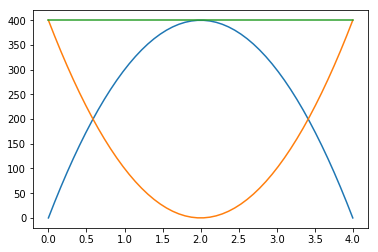

In [17]:
def path(v_0,g):
    def func(t):
        return v_0*t-0.5*g*t**2
    return func
def velocity(v_0,g):
    def func0(t):
        return v_0-g*t
    return func0
    
def kinetic(m):
    def func1(v):
        return 0.5*m*v**2
    return func1
def potential(m,g):
    def func2(y):
        return m*g*y
    return func2

 

g=10.0
m=2.0
v_0=20.0
g1=path(v_0,g)
v1=velocity(v_0,g) 
k1=kinetic(m)
p1=potential(m,g)
t=np.linspace(0,2*v_0/g,50)
y=map(g1,t)
velocity=map(v1,t)
kin=map(k1,velocity)
potential=map(p1,y)
mp.plot(t,potential)
mp.plot(t,kin)
Sum=map(lambda x,y:x+y,kin,potential)
mp.plot(t,Sum)

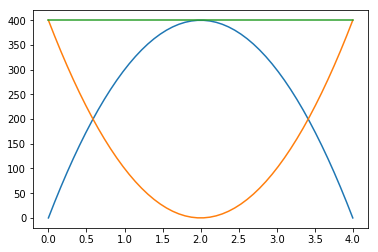

In [18]:
#********************
#vectorized function 
def path_vect(v_0,g):
    def func(t):
        y=t.copy()
        index=np.where(t==t)
        y[index]=v_0*t[index]-0.5*g*t[index]**2
        return y
    return func
def velocity_vect(v_0,g):
    def func0(t):
        v=t.copy()
        index=np.where(t==t)
        v[index]=v_0-g*t[index]
         
        return v
    return func0
    
def kinetic_vect(m):
    def func1(v):
        y=v.copy()
        index=np.where(v==v)
        y[index]=0.5*m*v[index]**2
        return y
    return func1
def potential_vect(m,g):
    def func2(y):
        E=y.copy()
        index=np.where(y==y)
        E[index]=m*g*y[index]
        return E
    return func2

g=10.0
m=2.0
v_0=20.0
g2=path_vect(v_0,g)
v2=velocity_vect(v_0,g) 
k2=kinetic_vect(m)
p2=potential_vect(m,g)
t=np.linspace(0,2*v_0/g,50)
y=g2(t)
velocity=v2(t)
kin=k2(velocity)
potential=p2(y)
mp.plot(t,potential)
mp.plot(t,kin)
Sum=map(lambda x,y:x+y,kin,potential)
mp.plot(t,Sum)
#By the law of energy conservation, we always have a constant total energy if no energy loses during the process 

Problem 3

In [19]:
import math 
def intergral(func,min_,max_,n):
    width=float((max_-min_))/n
    x=0
    Sum=0
    while x<n:
        Sum+=width*func(min_+x*width+0.5*width)
        x+=1

    return Sum

def exp(x):
    return math.exp(x)
def Cos(x):
    return math.cos(x)
def Sin(x):
    return math.sin(x)
print 'Mid point integral method'
print intergral(exp,0,math.log(3),100000)
print intergral(Cos,0,math.pi,100000)
print intergral(Sin,0,math.pi,100000)
print intergral(Sin,0,(math.pi)/2.0,100000)
#*******************************************
#build in function 
print 'Scipy integral'
from scipy.integrate import quad
ans0, er0 = quad(exp, 0, math.log(3))
print ans0
ans1, err1 = quad(Cos, 0, math.pi)
print ans1
ans2, err2 = quad(Sin, 0, math.pi)
print ans2
ans3, err3 = quad(Sin, 0, math.pi/2.0)
print ans3
#By the comparison, with more number of steps we put into integral, we have more accurate value 

Mid point integral method
1.99999999999
2.62492122222e-16
2.00000000008
1.00000000001
Scipy integral
2.0
4.92255263497e-17
2.0
1.0


Problem 4

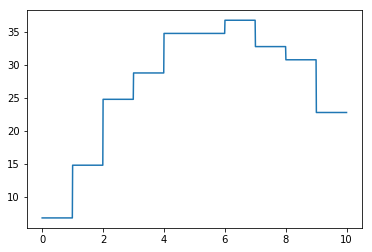

In [27]:
def function(x):
    return x*(12-x)+math.sin(math.pi*x)

def mid_point(func,min_,max_,n,x_):
    y=list()
    width=float((max_-min_))/n
    x=0
    Sum=0
    i=0
    
    while x<n:
        height=func(min_+x*width+0.5*width)
         
        while x_[i]>=x and x_[i]<=x+width and i<len(x_)-1:
            y.append(height)
            i=i+1
        x=x+width
    y.append(height)  
    return  y
x=np.linspace(0,10,1000)
y=map(function,x)
y_= mid_point(function,0,10.0,10,x)
mp.plot(x,y_)

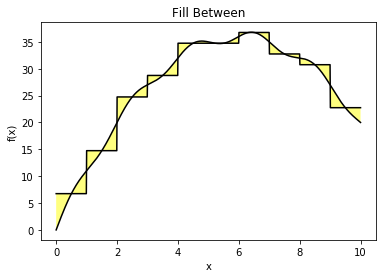

In [28]:
fig, ax = mp.subplots()
ax.plot(x, y, x, y_, color='black')
ax.fill_between(x, y, y_, where=y_>=y, facecolor='yellow', alpha=0.5)
ax.fill_between(x, y, y_, where=y_ <=y, facecolor='blue', alpha=0.5)
ax.set_title('Fill Between')
mp.xlabel('x')
mp.ylabel('f(x)')
mp.show()